#### This Notebook is focused at minutely understanding the price-action of BTC, ETH and BNB | We only consider 3 months worth of data (datapoint recorded every 1 minute)

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

In [3]:
'''
timestamp - A timestamp for the minute covered by the row.
Asset_ID - An ID code for the cryptoasset.
Count - The number of trades that took place this minute.
Open - The USD price at the beginning of the minute.
High - The highest USD price during the minute.
Low - The lowest USD price during the minute.
Close - The USD price at the end of the minute.
Volume - The number of cryptoasset units traded during the minute.
VWAP - The volume weighted average price for the minute.
Target - Residual log-return over 15 minute time-data. See the 'Prediction and Evaluation' section of this notebook for details of how the target is calculated.
'''
print('Done!')

Done!


In [4]:
'''

Basically the training_dataset contains ~3.8 years of data points for each asset
During Forecasting I have taken only 1 year worth of recent data (only for BTC)

'''


df_asset_details = pd.read_csv('../input/g-research-crypto-forecasting/asset_details.csv')
print('df_asset_details: ',df_asset_details.shape)
# df_sup_train = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv').iloc[-5000000:]
# print('sup_train: ',df_sup_train.shape)
df_train = pd.read_csv('../input/g-research-crypto-forecasting/train.csv').iloc[:350000] #~3 months worth of data-points
print('train_shape: ', df_train.shape)

df_asset_details:  (14, 3)
train_shape:  (350000, 10)


In [5]:
display(df_asset_details)

target_coins = ['Bitcoin', 'Ethereum', 'Binance Coin']

df_asset_dict = {k : v for k, v in zip(df_asset_details['Asset_Name'].values, df_asset_details['Asset_ID'].values)}
df_btc = df_train[df_train['Asset_ID'] == df_asset_dict[target_coins[0]]]
df_eth = df_train[df_train['Asset_ID'] == df_asset_dict[target_coins[1]]]
df_bnb = df_train[df_train['Asset_ID'] == df_asset_dict[target_coins[-1]]]

print('BTC-Len: ', len(df_btc), 'ETH-Len: ', len(df_eth), 'BNB-Len: ', len(df_bnb))

print()
display(df_btc)

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


BTC-Len:  44406 ETH-Len:  44406 BNB-Len:  44100



,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
2,1514764860,1,229.0,13835.194000,14013.80,13666.11,13850.176000,31.550062,13827.062093,-0.014643
10,1514764920,1,235.0,13835.036000,14052.30,13680.00,13828.102000,31.046432,13840.362591,-0.015037
18,1514764980,1,528.0,13823.900000,14000.40,13601.00,13801.314000,55.061820,13806.068014,-0.010309
26,1514765040,1,435.0,13802.512000,13999.00,13576.28,13768.040000,38.780529,13783.598101,-0.008999
34,1514765100,1,742.0,13766.000000,13955.90,13554.44,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...,...,...
349963,1517428920,1,330.0,10023.516667,10115.00,9930.00,10009.628707,62.466300,10012.959644,0.000911
349971,1517428980,1,370.0,10009.323027,10130.00,9928.70,10019.073333,40.542457,10014.467718,0.000997
349979,1517429040,1,262.0,10016.983333,10124.30,9927.50,10019.500000,21.543733,10018.746600,0.000857
349987,1517429100,1,210.0,10020.283333,10117.70,9924.20,10016.051667,27.640070,10015.023913,0.000203


### Visualizaton -- (1st Jan 2018 - 31st Jan 2018)

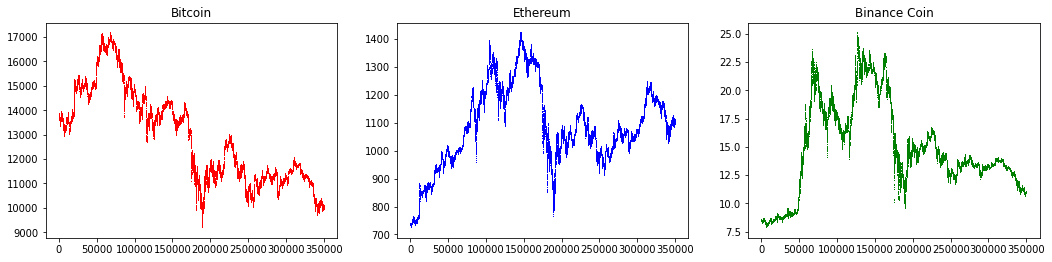

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize = (15, 4))

axs[0].plot(df_btc.Close, ',r')
axs[0].set_title(target_coins[0])
axs[1].plot(df_eth.Close, ',b')
axs[1].set_title(target_coins[1])
axs[2].plot(df_bnb.Close, ',g')
axs[2].set_title(target_coins[2])

plt.tight_layout(pad = 2)
plt.show()

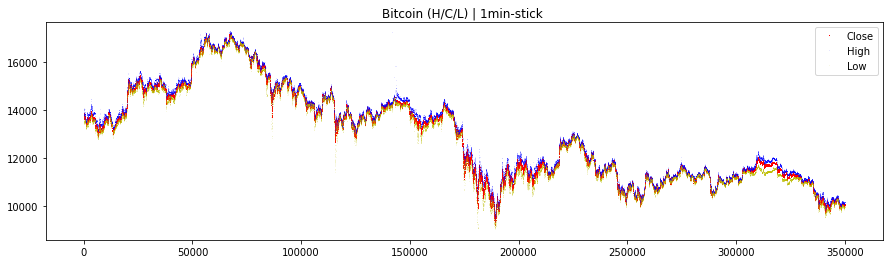

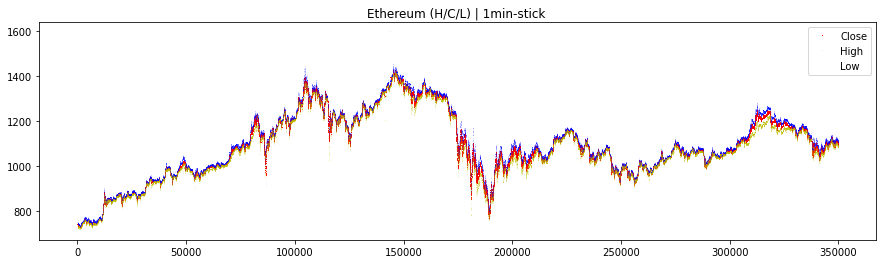

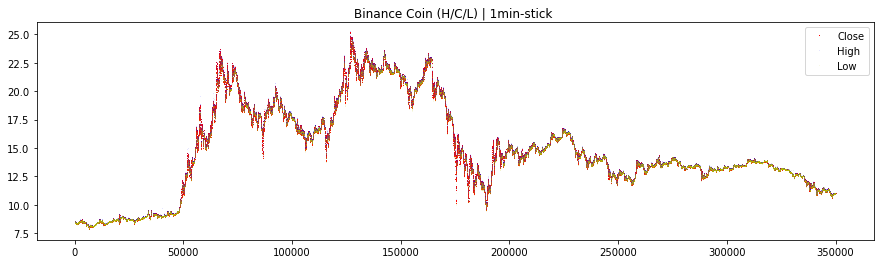

In [10]:
fig, axs = plt.subplots(1, 1, figsize = (15, 4))

axs.plot(df_btc.Close, ',r', label = 'Close')
axs.plot(df_btc.High, ',b', alpha = 0.1, label = 'High')
axs.plot(df_btc.Low, ',y', alpha = 0.1, label = 'Low')

axs.set_title(target_coins[0] + ' (H/C/L) | 1min-stick ')

plt.legend()
plt.show()

fig, axs = plt.subplots(1, 1, figsize = (15, 4))

axs.plot(df_eth.Close, ',r', label = 'Close')
axs.plot(df_eth.High, ',b', alpha = 0.1, label = 'High')
axs.plot(df_eth.Low, ',y', alpha = 0.1, label = 'Low')

axs.set_title(target_coins[1] + ' (H/C/L) | 1min-stick ')

plt.legend()
plt.show()

fig, axs = plt.subplots(1, 1, figsize = (15, 4))

axs.plot(df_bnb.Close, ',r', label = 'Close')
axs.plot(df_bnb.High, ',b', alpha = 0.1, label = 'High')
axs.plot(df_bnb.Low, ',y', alpha = 0.1, label = 'Low')

axs.set_title(target_coins[-1] + ' (H/C/L) | 1min-stick ')

plt.legend()
plt.show()

Mean:  12889.266742775877
Median:  12860.65
Std:  1916.305658199784


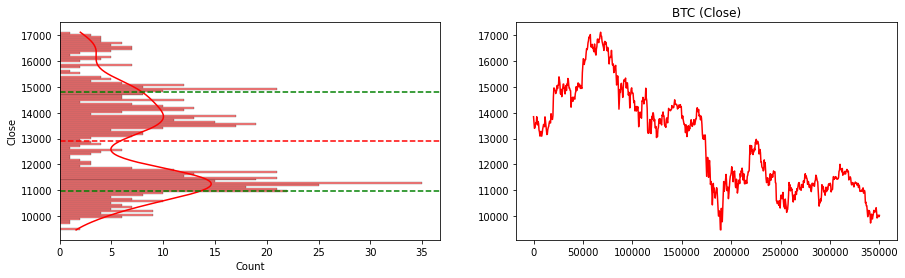


Mean:  1083.6039471434988
Median:  1067.6016666666667
Std:  145.5742844426898


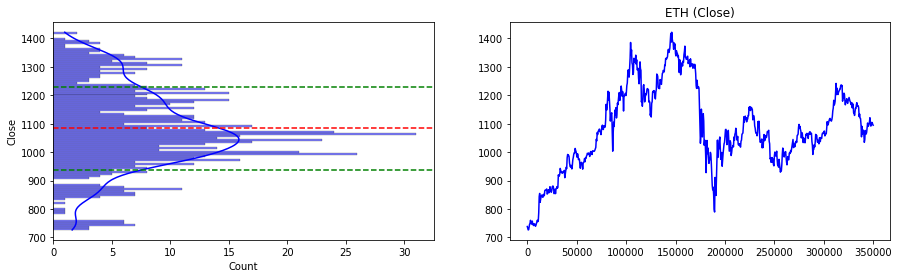

Mean:  14.765622993197276
Median:  13.8595
Std:  3.9684136016192837


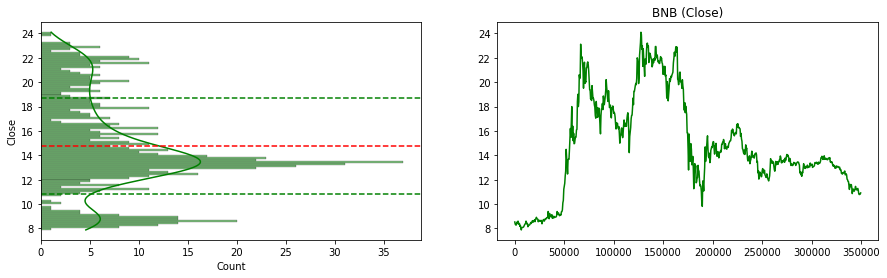

In [11]:
import seaborn as sns

#unit-stick = 1 min | 1 hr = 60 stick / datapoints ==> 1 month
sample_rate = 60
df_btc_1hr = df_btc.iloc[::sample_rate]

mean_value = df_btc_1hr.Close.describe().T['mean']
std = df_btc_1hr.Close.describe().T['std']

print('Mean: ', mean_value)
print('Median: ', df_btc_1hr.Close.describe().T['50%'])
print('Std: ', std)

'---------------------------------------------------------------------'

fig, axs = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(y=df_btc_1hr.Close, bins=100, kde=True, color='red', ax = axs[0])

axs[0].axhline(df_btc_1hr.Close.describe().T['mean'], color='red', linestyle='--', label=f'Mean')
axs[0].axhline(mean_value + std, color='green', linestyle='--')
axs[0].axhline(mean_value - std, color='green', linestyle='--')

axs[1].plot(df_btc_1hr.Close, 'r')
axs[1].set_title('BTC (Close)')

plt.show()

print()

'----------------------------------------------------------------------'

sample_rate = 60
df_eth_1hr = df_eth.iloc[::sample_rate]

mean_value = df_eth_1hr.Close.describe().T['mean']
std = df_eth_1hr.Close.describe().T['std']

print('Mean: ', mean_value)
print('Median: ', df_eth_1hr.Close.describe().T['50%'])
print('Std: ', std)

fig, axs = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(y=df_eth_1hr.Close, bins=100, kde=True, color='blue', ax = axs[0])

axs[0].axhline(df_eth_1hr.Close.describe().T['mean'], color='red', linestyle='--', label=f'Mean')
axs[0].axhline(mean_value + std, color='green', linestyle='--')
axs[0].axhline(mean_value - std, color='green', linestyle='--')

axs[1].plot(df_eth_1hr.Close, 'b')
axs[1].set_title('ETH (Close)')

plt.show()


'----------------------------------------------------------------------'

sample_rate = 60
df_bnb_1hr = df_bnb.iloc[::sample_rate]

mean_value = df_bnb_1hr.Close.describe().T['mean']
std = df_bnb_1hr.Close.describe().T['std']

print('Mean: ', mean_value)
print('Median: ', df_bnb_1hr.Close.describe().T['50%'])
print('Std: ', std)

fig, axs = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(y=df_bnb_1hr.Close, bins=100, kde=True, color='green', ax = axs[0])

axs[0].axhline(df_bnb_1hr.Close.describe().T['mean'], color='red', linestyle='--', label=f'Mean')
axs[0].axhline(mean_value + std, color='green', linestyle='--')
axs[0].axhline(mean_value - std, color='green', linestyle='--')

axs[1].plot(df_bnb_1hr.Close, 'g')
axs[1].set_title('BNB (Close)')

plt.show()

#### The return-distribution (in 1hr candlestick) approximates/follows a gaussian-distribution - wihch indicates not much (drastic) price variations/movements in lower time-frames (1min - 1hr) which is obvious

BTC
Mean (1hr perc-change): -0.03055%, Std (1hr perc-change): 1.62078%, Total-prec-change: -22.61055%

ETH
Mean (1hr perc-change): 0.07338%, Std (1hr perc-change): 2.01456%, Total-prec-change: 54.30055%

BNB
Mean (1hr perc-change): 0.08969%, Std (1hr perc-change): 3.37881%, Total-prec-change: 65.83396%



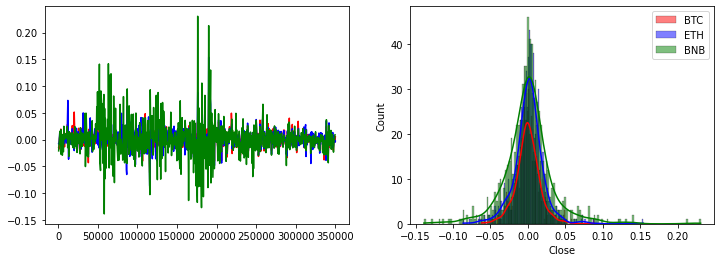

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))


df_btc_1hr.Close.pct_change().plot(ax = axs[0], color = 'red', label = 'BTC')
df_eth_1hr.Close.pct_change().plot(ax = axs[0], color = 'blue', label = 'ETH')
df_bnb_1hr.Close.pct_change().plot(ax = axs[0], color = 'green', label = 'BNB')


## Mean 1hr average percentage change
mean_return = df_btc_1hr.Close.pct_change().describe()['mean']
std_return = df_btc_1hr.Close.pct_change().describe()['std']
sum_percent = df_btc_1hr.Close.pct_change().sum()

print('BTC')
print(f'Mean (1hr perc-change): {(mean_return * 100):.5f}%, Std (1hr perc-change): {(std_return * 100):.5f}%, Total-prec-change: {(sum_percent * 100):.5f}%')
print()

mean_return = df_eth_1hr.Close.pct_change().describe()['mean']
std_return = df_eth_1hr.Close.pct_change().describe()['std']
sum_percent = df_eth_1hr.Close.pct_change().sum()

print('ETH')
print(f'Mean (1hr perc-change): {(mean_return * 100):.5f}%, Std (1hr perc-change): {(std_return * 100):.5f}%, Total-prec-change: {(sum_percent * 100):.5f}%')
print()

mean_return = df_bnb_1hr.Close.pct_change().describe()['mean']
std_return = df_bnb_1hr.Close.pct_change().describe()['std']
sum_percent = df_bnb_1hr.Close.pct_change().sum()

print('BNB')
print(f'Mean (1hr perc-change): {(mean_return * 100):.5f}%, Std (1hr perc-change): {(std_return * 100):.5f}%, Total-prec-change: {(sum_percent * 100):.5f}%')
print()


sns.histplot(df_btc_1hr.Close.pct_change(), bins=150, kde=True, color='red', ax = axs[1], label = 'BTC')
sns.histplot(df_eth_1hr.Close.pct_change(), bins=150, kde=True, color='blue', ax = axs[1], label = 'ETH')
sns.histplot(df_bnb_1hr.Close.pct_change(), bins=150, kde=True, color='green', ax = axs[1], label = 'BNB')

plt.legend()
plt.show()

### Understanding Moving-Averages (Short-term (MA-20), Long-term (MA-120))

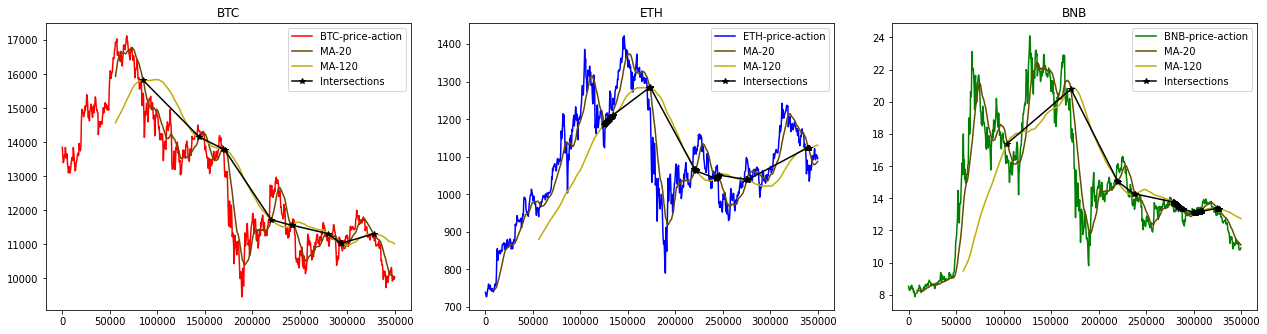

In [13]:
ma_20 = 20
ma_120 = 120

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

epsilon = 10  # Approximation error of $10

# Calculate moving averages
btc_ma_120_close = df_btc_1hr.Close.rolling(window=ma_120).mean().dropna()
btc_ma_20_close = df_btc_1hr.Close.rolling(window=ma_20).mean().dropna()

# Align the lengths of moving averages
btc_ma_20_close = btc_ma_20_close[ma_120 - ma_20:]

# Find intersections where the difference between ma_20 and ma_120 is within epsilon
btc_1hr_int = np.abs(btc_ma_20_close.values - btc_ma_120_close.values) < epsilon
intersection_close = btc_ma_120_close[btc_1hr_int]
btc_ma_120_time = btc_ma_120_close.index[btc_1hr_int]

# Plot BTC
df_btc_1hr.Close.plot(color='red', label='BTC-price-action', ax=axs[0])
btc_ma_20_close.plot(color='#664b01', label='MA-20', ax=axs[0])
btc_ma_120_close.plot(color='#bfad06', label='MA-120', ax=axs[0])

# Plot intersection points
axs[0].plot(btc_ma_120_time, intersection_close, color='black', label='Intersections', marker = '*')
axs[0].set_title('BTC')
axs[0].legend()

# Calculate moving averages
eth_ma_120_close = df_eth_1hr.Close.rolling(window=ma_120).mean().dropna()
eth_ma_20_close = df_eth_1hr.Close.rolling(window=ma_20).mean().dropna()

# Align the lengths of moving averages
eth_ma_20_close = eth_ma_20_close[ma_120 - ma_20:]

# Find intersections where the difference between ma_20 and ma_120 is within epsilon
eth_1hr_int = np.abs(eth_ma_20_close.values - eth_ma_120_close.values) < epsilon
intersection_close = eth_ma_120_close[eth_1hr_int]
eth_ma_120_time = eth_ma_120_close.index[eth_1hr_int]

# Plot ETH
df_eth_1hr.Close.plot(color='blue', label='ETH-price-action', ax=axs[1])
df_eth_1hr.Close.rolling(window=ma_20).mean().dropna().plot(color='#664b01', label='MA-20', ax=axs[1])
df_eth_1hr.Close.rolling(window=ma_120).mean().dropna().plot(color='#bfad06', label='MA-120', ax=axs[1])

axs[1].plot(eth_ma_120_time, intersection_close, color='black', label='Intersections', marker = '*')
axs[1].set_title('ETH')
axs[1].legend()


epsilon = 0.1

# Calculate moving averages
bnb_ma_120_close = df_bnb_1hr.Close.rolling(window=ma_120).mean().dropna()
bnb_ma_20_close = df_bnb_1hr.Close.rolling(window=ma_20).mean().dropna()

# Align the lengths of moving averages
bnb_ma_20_close = bnb_ma_20_close[ma_120 - ma_20:]

# Find intersections where the difference between ma_20 and ma_120 is within epsilon
bnb_1hr_int = np.abs(bnb_ma_20_close.values - bnb_ma_120_close.values) < epsilon
intersection_close = bnb_ma_120_close[bnb_1hr_int]
bnb_ma_120_time = bnb_ma_120_close.index[bnb_1hr_int]

# Plot BNB
df_bnb_1hr.Close.plot(color='green', label='BNB-price-action', ax=axs[2])
df_bnb_1hr.Close.rolling(window=ma_20).mean().dropna().plot(color='#664b01', label='MA-20', ax=axs[2])
df_bnb_1hr.Close.rolling(window=ma_120).mean().dropna().plot(color='#bfad06', label='MA-120', ax=axs[2])

axs[2].plot(bnb_ma_120_time, intersection_close, color='black', label='Intersections', marker = '*')
axs[2].set_title('BNB')
axs[2].legend()

plt.tight_layout(pad=2)
plt.show()


### Volatality Assesment - MA-20 of Percentage change of the assets (BTC, ETH, BNB) 

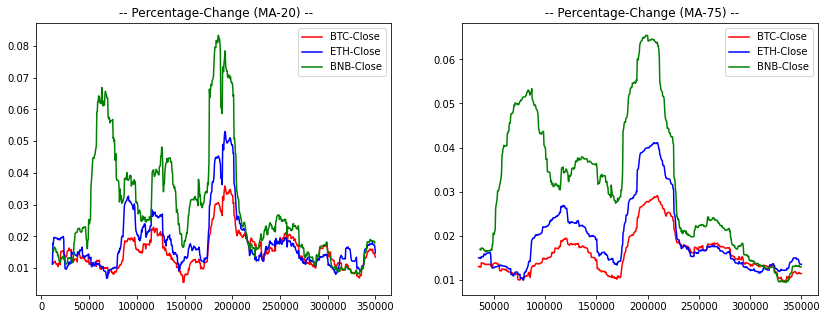

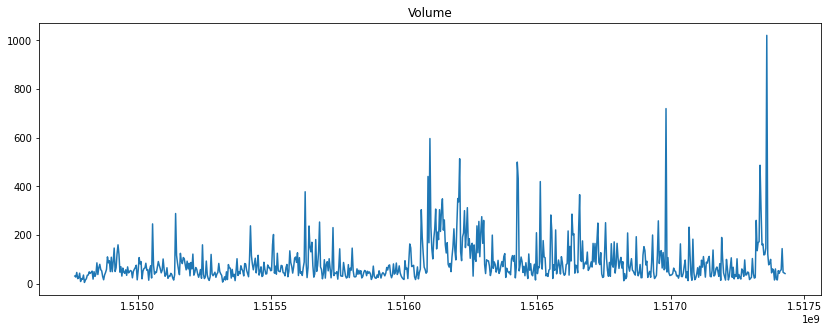

In [44]:
fig, axs = plt.subplots(1, 2, figsize = (14, 5))

### std-dev of returns - 30 data-point (period) (30 minutes) rolling volatilty
df_btc_1hr.Close.pct_change().rolling(window=25).std().plot(label = 'BTC-Close', color = 'red', ax = axs[0])
df_eth_1hr.Close.pct_change().rolling(window=25).std().plot(label = 'ETH-Close', color = 'blue', ax = axs[0])
df_bnb_1hr.Close.pct_change().rolling(window=25).std().plot(label = 'BNB-Close', color = 'green', ax = axs[0])
axs[0].set_title(' -- Percentage-Change (MA-20) --')
axs[0].legend()

df_btc_1hr.Close.pct_change().rolling(window=75).std().plot(label = 'BTC-Close', color = 'red', ax = axs[1])
df_eth_1hr.Close.pct_change().rolling(window=75).std().plot(label = 'ETH-Close', color = 'blue', ax = axs[1])
df_bnb_1hr.Close.pct_change().rolling(window=75).std().plot(label = 'BNB-Close', color = 'green', ax = axs[1])
axs[1].set_title(' -- Percentage-Change (MA-75) --')

axs[1].legend()
plt.show()

fig, axs = plt.subplots(1, 1, figsize = (14, 5))

axs.plot(df_btc_1hr.timestamp, df_btc_1hr.Volume)
axs.set_title('Volume')
plt.show()

#### Volume, Volatility & VWAP Correlation -> Understanding (unit-stick)

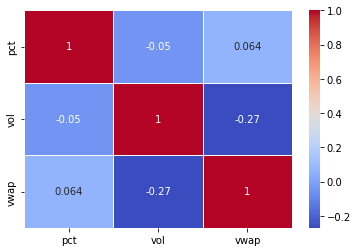

In [52]:
df_btc_vol_vm = pd.DataFrame({'pct' : df_btc_1hr.Close.pct_change(), 'vol' : df_btc_1hr.Volume, 'vwap' : df_btc_1hr.VWAP}).dropna()
corr_matrix = df_btc_vol_vm.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### The Correlation between BTC - ETH - BNB & Volume Relation Understanding

In [61]:
df_btc_1hr.index, df_eth_1hr.index, df_bnb_1hr.index = np.arange(0, len(df_btc_1hr)), np.arange(0, len(df_eth_1hr)), np.arange(0, len(df_bnb_1hr)) 

Lengths:  741 741 735


,btc_close,eth_close,bnb_close
0,13850.176000,738.507500,8.5300
1,13642.900203,732.770000,8.3500
2,13399.920000,726.590000,8.2888
3,13423.548000,727.122500,8.2789
4,13509.502000,736.822500,8.3953
...,...,...,...
730,10154.620000,1092.578333,10.8400
731,10168.166667,1098.814000,10.7800
732,10256.016667,1106.571667,10.7936
733,10321.961667,1121.268333,10.8142


           btc_close  eth_close  bnb_close
btc_close   1.000000   0.088304   0.351337
eth_close   0.088304   1.000000   0.739481
bnb_close   0.351337   0.739481   1.000000


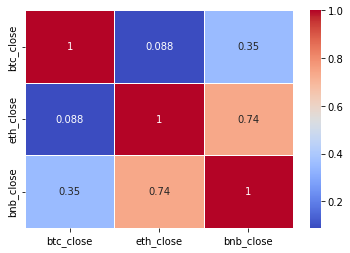

In [62]:
print('Lengths: ', len(df_btc_1hr.Close), len(df_eth_1hr.Close), len(df_bnb_1hr.Close))

df_1hr = pd.DataFrame({'btc_close': df_btc_1hr.Close, 'eth_close' : df_eth_1hr.Close, 'bnb_close': df_bnb_1hr.Close}).dropna()
display(df_1hr)

corr_matrix = df_1hr.corr()

print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
#'''
print('**'*20,'1000 mins | 16.66 hrs data_represented', '**'*20)
print()
sns.set_style('darkgrid')
fig, axs = plt.subplots(7,2, figsize=(16,14))
step = 0
for i in range(2):
    for j in range(7):
        axs[j,i].set_title(inv_asset_dict.get(step))
        axs[j,i].plot(asset_info_time[step][:1000],asset_info_high[step][:1000], ',b' ,label = 'High')
        axs[j,i].plot(asset_info_time[step][:1000],asset_info_low[step][:1000], ',r',label='Low')
        axs[j,i].legend()
        step+=1
plt.tight_layout(pad=2)#'''

print('Done!')

In [ ]:
asset_info_count = df_train.groupby('Asset_ID')['Count']
asset_info_count = asset_info_count.agg(lambda x: list(x))
asset_info_vol = df_train.groupby('Asset_ID')['Volume']
asset_info_vol = asset_info_vol.agg(lambda x: list(x)) 

print(asset_info_count.head())
print()
print(asset_info_vol.head())

In [ ]:
#'''
print()
print('**'*20,'|| Trades/Transactions per minute ||', '**'*20)
print()
sns.set_style('darkgrid')
fig, axs = plt.subplots(7,2, figsize=(20,18))
step = 0
for i in range(2):
    for j in range(7):
        axs[j,i].set_title(inv_asset_dict.get(step))
        axs[j,i].bar(asset_info_time[step][:1000],asset_info_count[step][:1000], edgecolor = 'black')
        axs[j,i].set_xlabel('timestamps')
        axs[j,i].set_ylabel('Trade_Count')
        step+=1
plt.tight_layout(pad=2)
plt.show()
print()
print('**'*20,'|| Volume per minute ||', '**'*20)
print()
fig, axs = plt.subplots(7,2, figsize=(20,18))
step = 0
for i in range(2):
    for j in range(7):
        axs[j,i].set_title(inv_asset_dict.get(step))
        axs[j,i].bar(asset_info_time[step][:1000],asset_info_vol[step][:1000], edgecolor = 'black')
        axs[j,i].set_xlabel('timestamps')
        axs[j,i].set_ylabel('Volume')
        step+=1
plt.tight_layout(pad=2)
plt.show()
#'''
print('Done!')

In [ ]:
asset_info_targ = df_train.groupby('Asset_ID')['Target']
asset_info_targ = asset_info_targ.agg(lambda x: list(x)) 

print(asset_info_targ.head())
asset_dict = {value:key for key, value in inv_asset_dict.items()}

In [ ]:
#'''
import random
print()
print('**'*20,'|| Residualised Return per minute ||', '**'*20)
print()

colors = ['cyan','green','red','blue','gold','red','black','orange','magenta','deeppink','lime','slategray','yellow','darkviolet'] ## all possible colors 
name_plot = ['Bitcoin', 'Ethereum', 'Dogecoin']


fig, axs = plt.subplots(1,1, figsize=(18,14))
#axs[0].set_title(inv_asset_dict.get(step))
for name in name_plot:
    #step = random.randint(0,len(list(asset_dict))-1) ## random_sample 3 coins
    step = asset_dict.get(name)
    axs.plot(asset_info_time[step][:10000],asset_info_targ[step][:10000], c=colors[step], label=inv_asset_dict.get(step))
axs.set_xlabel('Timestamps')
axs.set_ylabel('Res. Returns')
axs.legend()
#plt.tight_layout(pad=2)
plt.show()
#'''
print('Done!')

In [ ]:
print(df_temp.info())
print('**'*40)
print(df_temp.isnull().sum())
print('**'*40)
df_temp_2 = df_temp.fillna(method = 'ffill')
print(df_temp_2.isnull().sum())

### Better-Visualization (~preprocessed)

In [ ]:
import numpy as np
import gc

df_sep_dict = {}

print('df_temp_2_shape : ', df_temp_2.shape)

for key in list(asset_dict):
    asset_dict = {value:key for key, value in inv_asset_dict.items()}
    mid = asset_dict[key]
    df_mid = df_temp_2[df_temp_2['Asset_ID'] == mid] 
    df_mid.index = df_mid.timestamp
    df_mid = df_mid.drop('timestamp', axis = 1)
    print(key+' _before : ')
    print((df_mid.index[1:] - df_mid.index[:-1]).value_counts().head())
    df_mid = df_mid.reindex(range(df_mid.index[0], df_mid.index[-1]+60, 60), method = 'pad') ## gap filling in the continumm to a constant value
    print()
    print(key+' _after : ')
    print((df_mid.index[1:] - df_mid.index[:-1]).value_counts().head())
    df_sep_dict[key] = df_mid
    print('**'*20)


del df_train
del df_temp    
del df_temp_2
gc.collect()


In [ ]:
#'''
fig, axs = plt.subplots(7,2, figsize=(24,18))

req_name = ['Bitcoin', 'Ethereum','Dogecoin']
for step, i in enumerate(df_asset_details['Asset_Name'].tolist()):
    if step < 7:
        axs[step,0].plot(df_sep_dict[i].index, df_sep_dict[i].Close, ',k')
        axs[step,0].set_title(i + ' (Complete_train_space) ')
        axs[step,0].set_xlabel('Time_Axis')
        axs[step,0].set_ylabel('Closing_Price')
    else:
        axs[step-7,1].plot(df_sep_dict[i].index, df_sep_dict[i].Close, ',k')
        axs[step-7,1].set_title(i + ' (Complete_train_space) ')
        axs[step-7,1].set_xlabel('Time_Axis')
        axs[step-7,1].set_ylabel('Closing_Price')

plt.tight_layout(pad=2)
plt.show()

print()
print('**'*20, 'VWAP_plot (on_complete_trian_space)', "**"*20)
print()

fig, axs = plt.subplots(7,2, figsize=(24,18))

req_name = ['Bitcoin', 'Ethereum','Dogecoin']
for step, i in enumerate(df_asset_details['Asset_Name'].tolist()):
    if step < 7:
        axs[step,0].plot(df_sep_dict[i].index, df_sep_dict[i].VWAP, 'b')
        axs[step,0].set_title(i + ' (Complete_train_space) ')
        axs[step,0].set_xlabel('Time_Axis')
        axs[step,0].set_ylabel('Closing_Price')
    else:
        axs[step-7,1].plot(df_sep_dict[i].index, df_sep_dict[i].VWAP, 'b')
        axs[step-7,1].set_title(i + ' (Complete_train_space) ')
        axs[step-7,1].set_xlabel('Time_Axis')
        axs[step-7,1].set_ylabel('Closing_Price')

plt.tight_layout(pad=2)
plt.show()
#'''
print('Done!')

In [ ]:
import tensorflow as tf
import warnings 
warnings.filterwarnings('ignore')

tpu  = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strat = tf.distribute.TPUStrategy(tpu)

print("Number of accelerators: ", tpu_strat.num_replicas_in_sync)

In [ ]:
import pickle

''' Dumping the Data '''
# dict_file = open('BTC_dict_data(last_btc_520k).pkl', 'wb')
# pickle.dump(df_sep_dict['Bitcoin'], dict_file)
# dict_file.close()

dict_file = open('../input/520k-btc-only/BTC_dict_data(last_btc_520k).pkl', 'rb')
df_btc = pickle.load(dict_file)
dict_file.close()

In [ ]:
import pandas as pd

df_btc.index = pd.date_range('2020-12-28', periods = len(df_btc), freq='min') # use freq = 'min' to get minute data

In [ ]:
df_btc.Close.plot(figsize=(16,12)) ## They daily update the data to recent one | last year data

In [ ]:
import matplotlib.pyplot as plt
df_btc.loc['2021-11-1':].Close.plot(figsize=(16,12)) #localising recent past 
df_btc.iloc[-50000:].Close.plot(figsize=(16,12), c='r', alpha=0.5)
plt.show()

In [ ]:
new_col_order = ['Count','Open','High','Low','Volume','VWAP','Target','Close']


display(df_btc.head())
df_btc = df_btc.reindex(columns = new_col_order)
display(df_btc.head())


In [ ]:
df_btc.iloc[-50000:].Close.plot(figsize=(10,8))

## Predictive Modelling

In [ ]:
import tensorflow as tf
import numpy as np
import gc
import math as mt

seed = 28
np.random.seed(seed)


def Data_func(data, past, delay, minn, maxx = None, shuffle=False, batch_size=128, rate=6):
    if maxx is None:
        maxx = len(data) - delay -1
    i = minn + past
    batch_no = 1

    while True:

        if shuffle:
            rows = np.random.randint(minn + past, maxx, size = batch_size)
        else:
            rows = np.arange(i, min(i + batch_size, maxx))
        
        i+=len(rows)
        if i + batch_size > maxx: ## when you increase the past too much this statement gets executed at the first batch creation // add more data to overcome
            break
        
        samples = np.zeros((len(rows), past // rate, data.shape[-1]))
        targets = np.zeros((len(rows),))
        cbase_preds = np.zeros((len(rows),))
    
        for j, row in enumerate(rows):
            
            indices = range(rows[j] - past, rows[j], rate) ## take every point
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay - 1][-1]
       
        if batch_no == 1:
            print('im here')
            new_sample = samples
            new_targets = targets
            print('Ini_samples: ', samples.shape, 'Ini_targets: ', targets.shape)
        else:
            new_sample = np.concatenate([new_sample, samples], axis=0)
            new_targets = np.concatenate([new_targets, targets], axis=0)
        batch_no+=1
        
    return new_sample, new_targets

def Baseline_func(data, past, delay, minn, maxx = None , shuffle=False, batch_size=128, rate=6):
    if maxx is None:
        maxx = len(data) - delay -1
    i = minn + past
    batch_no = 1

    while True:

        if shuffle:
            rows = np.random.randint(minn + past, maxx, size = batch_size)
        else:
            rows = np.arange(i, min(i + batch_size, maxx))
        
        i+=len(rows)
        if i + batch_size > maxx:
            break
        
        cbase_preds = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            cbase_preds[j] = data[rows[j]][-1]
            
        if batch_no == 1:
            new_cbase_preds = cbase_preds
            print('Ini_cbase_pred: ', new_cbase_preds.shape)
        else:
            new_cbase_preds = np.concatenate([new_cbase_preds, cbase_preds], axis=0)
        batch_no+=1
        
    return new_cbase_preds



#'''    
x_train = df_btc.iloc[-50000:].copy() ## Localising training => prediction space

print()
x_train = x_train.to_numpy()

print('BTC_train: ',x_train.shape)

past = 360 ## ==>> looks !1 but 6hrs days back 

''' The problem statement involves being able to predict next 15 mins (very much possible!) residualized returns | NO DELAY '''
''' Target 15 datapoints from current point'''
delay = 0 ## Targeting after 15 mins | NOT correctt implementation 

train_split, test_split = 0.60, 0.25
train_max = round(train_split * x_train.shape[0])
val_max = (1-train_split)*x_train.shape[0]
test_max = round(test_split*val_max)
val_max = round(val_max - test_max)

''' use batch_size = 15 in accordance to the problem statement'''
bs = 15

mean = x_train[:train_max].mean(axis = 0)
x_train -= mean
std = x_train[:train_max].std(axis = 0)
x_train /= std

val_steps =  (train_max+val_max) - (train_max+1) - past ## (-past) because no target values for last  720 points
test_steps = (train_max+val_max+test_max)-(train_max+val_max+1) - past

print('Train_Max: ', mt.floor(train_max),', Val_Max: ', mt.floor(val_max),', Test_Max: ', mt.floor(test_max))
print()
#'''        
train_data = Data_func(x_train, past, delay, minn = 0, maxx = train_max - 1, batch_size=bs, shuffle=True, rate=5) ## sampling data every 5 minutes
cbase_train_data = Baseline_func(x_train, past, delay, minn = 0, maxx = train_max - 1, batch_size=bs, shuffle=True, rate=5) ## sampling data every 5 minutes

temp, _ = train_data
print('--'*20)
print('Done - Train_data: ', temp.shape)
print('Cbase_data: ', cbase_train_data.shape)
print('--'*20)
val_data = Data_func(x_train, past, delay, minn = train_max+1, maxx = train_max + val_max - 1, batch_size=bs, rate=5)
cbase_val_data = Baseline_func(x_train, past, delay, minn = train_max+1, maxx = train_max + val_max - 1, batch_size= bs, rate=5)

temp, _ = val_data 
print('--'*20)
print('Done - Val_data: ', temp.shape)
print('Cbase_data: ', cbase_val_data.shape)
print('--'*20)
#'''
test_data = Data_func(x_train, past, delay, minn = train_max+val_max+1, batch_size=bs, rate = 5)
cbase_test_data = Baseline_func(x_train, past, delay, minn = train_max+val_max+1, batch_size= bs, rate = 5)

temp, _ = test_data
print('--'*20)
print('Done - Test_data: ', temp.shape)
print('Cbase_data: ', cbase_test_data.shape)
print('--'*20)

train_sample, train_label = train_data ## sample contains return 
val_sample, val_label = val_data
test_sample, test_label = test_data

del temp
del train_data
del val_data
del test_data
gc.collect()

In [ ]:
import numpy as np
import tensorflow as tf
import gc

print('train_sample: ', train_sample.shape, 'train_label: ', train_label.shape)
tr_dataset = tf.data.Dataset.from_tensor_slices((train_sample, train_label)).repeat().batch(bs) #.cache().prefetch(tf.data.AUTOTUNE) ## use repeat() before batching while using TPU
val_dataset = tf.data.Dataset.from_tensor_slices((val_sample, val_label)).repeat().batch(bs) #.cache().prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_sample, test_label)).repeat().batch(bs) #.cache().prefetch(tf.data.AUTOTUNE)
del train_sample 
del train_label
gc.collect()

In [ ]:
### CommonSense Model
import numpy as np
from statsmodels.tools.eval_measures import meanabs, rmse

target_std = np.std(val_label)

'''always predicting the current return to be the 15 min later return '''

print('CommonSense - BaseLines - MAE -----')
print()
print('__Val__')
## using present info (latest info) as our prediction after 'delay' mins
print('MAE: ',meanabs(cbase_val_data, val_label))
print('RMSE: ', rmse(cbase_val_data, val_label))
print()
print('__Test__')
## using present info (latest info) as our prediction after 'delay' mins
print('MAE: ',meanabs(cbase_test_data, test_label))
print('RMSE: ', rmse(cbase_test_data, test_label))
print()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

fig, axs = plt.subplots(1,1, figsize = (15,8))

axs.plot(np.arange(0,1500), cbase_test_data[:1500], label = 'Common_Baseline') 
axs.plot(np.arange(0,1500), test_label[:1500], label = 'Real_Data')
axs.legend()
plt.show()

### USE DNN and 1D_CNN + RNN

In [ ]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(72,8)),
    tf.keras.layers.Dense(128, activation = 'linear'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1)
    
])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
dnn_model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
dnn_model.fit(tr_dataset, epochs=50, validation_data = val_dataset, validation_steps = val_steps, steps_per_epoch =128, callbacks=[es])
print('Training_Done ... ')

In [ ]:
dnn_model = tf.keras.models.load_model('../input/all-models/dnn_model.h5')

In [ ]:
print(dnn_model.evaluate(val_dataset, steps=128))
print(dnn_model.evaluate(test_dataset, steps=128))

In [ ]:
test_pred_data = [(sample, target) for sample, target in test_dataset.take(1)]
test_sample, test_target = test_pred_data[0] ## next 32 data-points | accounting for 32 mins prediction
x_lin = np.arange(0,test_target.shape[0]) 
def inv_norm(test_target):
    test_target = np.ravel(test_target)
    test_target = test_target * std[-1]
    test_target = test_target + mean[-1]
    return test_target

test_pred = dnn_model.predict(test_sample)
inv_test_pred = inv_norm(test_pred)
# test_pred_parent = inv_stdn(parent_model.predict(test_sample))
inv_test_target = inv_norm(test_target)

fig = plt.figure(figsize=(15,8))
plt.plot(x_lin, inv_test_target, 'k', label = 'test')
plt.plot(x_lin, inv_test_pred, 'r',  label = 'dnn_model')
# plt.plot(x_lin, test_pred_parent, 'g', label = 'parent_model')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tools.eval_measures import meanabs

print('MAE: ', meanabs(inv_test_target, inv_test_pred))
print('Mean_target: ', np.mean(inv_test_target))
print('Mean_P_Error: ', (meanabs(inv_test_target, inv_test_pred) / np.mean(inv_test_target)) * 100, '%')

In [ ]:
dnn_model.save('./dnn_model.h5')

In [ ]:
cnn_rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(72,8)),
    tf.keras.layers.Conv1D(128, 5),
    tf.keras.layers.Dense(264, activation='relu'),
    tf.keras.layers.GRU(264, return_sequences=True),
    tf.keras.layers.GRU(264),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
]) 

cnn_rnn_model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
cnn_rnn_model.summary()

es = tf.keras.callbacks.EarlyStopping(patience=5)
cnn_rnn_model.fit(tr_dataset, epochs=20, validation_data = val_dataset, validation_steps = val_steps, steps_per_epoch =128, callbacks=[es])
print('Training_Done...')

In [ ]:
cnn_rnn_model = tf.keras.models.load_model('../input/all-models/cnn_rnn_model.h5')

In [ ]:
print(cnn_rnn_model.evaluate(val_dataset, steps=128))
print(cnn_rnn_model.evaluate(test_dataset, steps=128))

In [ ]:
cnn_rnn_model.save('./cnn_rnn_model.h5')
print('saved cnn_rnn_model')

In [ ]:
test_pred_data = [(sample, target) for sample, target in test_dataset.take(1)]
test_sample, test_target = test_pred_data[0] ##after validation set => next 32 datapoints | accounting for next 32 min prediction
x_lin = np.arange(0,test_target.shape[0]) 
def inv_norm(test_target):
    test_target = np.ravel(test_target)
    test_target = test_target * std[-1]
    test_target = test_target + mean[-1]
    return test_target

test_pred = cnn_rnn_model.predict(test_sample)
inv_test_pred = inv_norm(test_pred)
# test_pred_parent = inv_stdn(parent_model.predict(test_sample))
inv_test_target = inv_norm(test_target)

fig = plt.figure(figsize=(15,8))
plt.plot(x_lin, inv_test_target, 'k', label = 'test')
plt.plot(x_lin, inv_test_pred, 'r',  label = 'dnn_model')
# plt.plot(x_lin, test_pred_parent, 'g', label = 'parent_model')
plt.legend()
plt.show()

In [ ]:
print('MAE: $ ' + str(meanabs(inv_test_target, inv_test_pred)))
print('Mean_target: $ ' + str(np.mean(inv_test_target)))
print('Mean_P_Error: ', (meanabs(inv_test_target, inv_test_pred) / np.mean(inv_test_target)) * 100, '%')

#### EXtended PREDiction | For DNN Model

In [ ]:
test_pred_data = [(sample, target) for sample, target in test_dataset.take(3)]

test_list, target_list = test_pred_data[0]

for x_test, x_test_target in test_pred_data[1:]:
    test_list = tf.concat([test_list, x_test], axis=0)
    target_list = tf.concat([target_list, x_test_target], axis=0)



In [ ]:
x_lin = np.arange(0,target_list.shape[0]) 
test_pred = dnn_model.predict(test_list)

print('Prediction_Shape: ', test_pred.shape,'Target_Shape: ',target_list.shape)

def inv_norm(test_target):
    test_target = np.ravel(test_target)
    test_target = test_target * std[-1]
    test_target = test_target + mean[-1]
    return test_target

inv_target_list = inv_norm(target_list)
inv_test_pred = inv_norm(test_pred)

fig = plt.figure(figsize=(15,8))
plt.plot(x_lin, inv_target_list, 'k', label = 'test')
plt.plot(x_lin, inv_test_pred, 'r',  label = 'dnn_model')
# plt.plot(x_lin, test_pred_parent, 'g', label = 'parent_model')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tools.eval_measures import rmse

print('MAE: $ ' + str(meanabs(inv_target_list, inv_test_pred)))
print('Mean_target: $ ' + str(np.mean(inv_target_list)))
print('Mean_P_Error: ', (meanabs(inv_target_list, inv_test_pred) / np.mean(inv_target_list)) * 100, '%')

print('RMSE: $ ' + str(rmse(inv_target_list, inv_test_pred)))

SESSION STOPPER

In [ ]:
import time
for i in range(50):
    print('Time: ', i)
    time.sleep(30*60)

Well thats it for now... next we will use Some advanced Sequential models & some financial models for gaining insights + forecasting  

In [ ]:
'''import gresearch_crypto as gs
env = gs.make_env()
iter_test = env.iter_test()
for (test_df, _) in iter_test:
    sample_prediction_df['Target'] = 0  
    env.predict(sample_prediction_df)'''